In [ ]:
import torch
from torchvision import datasets, transforms
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math
from typing import List
from tqdm import tqdm
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Define a data transform to convert the data to PyTorch tensors
transform = transforms.ToTensor()

# ============ FashionMNIST ============
# Load the training and testing datasets
train_dataset_fashion = datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_dataset_fashion = datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)
labels_fashion = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
labels_CIFAR10 = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Create data loaders to iterate through the datasets
train_loader_fashion = torch.utils.data.DataLoader(train_dataset_fashion, batch_size=len(train_dataset_fashion), shuffle=True)
test_loader_fashion = torch.utils.data.DataLoader(test_dataset_fashion, batch_size=len(test_dataset_fashion), shuffle=False)

# Access the data and labels
X_train_fashion_raw, y_train_fashion_beforeSplit = next(iter(train_loader_fashion))
X_test_fashion_raw, y_test_fashion = next(iter(test_loader_fashion))

# ============ CIFAR10 ============
# Load the training and testing datasets
train_dataset_CIFAR10 = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
test_dataset_CIFAR10 = datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)

# Create data loaders to iterate through the datasets
train_loader_CIFAR10 = torch.utils.data.DataLoader(train_dataset_CIFAR10, batch_size=len(train_dataset_CIFAR10), shuffle=True)
test_loader_CIFAR10 = torch.utils.data.DataLoader(test_dataset_CIFAR10, batch_size=len(test_dataset_CIFAR10), shuffle=False)

# Access the data and labels
X_train_CIFAR10_raw, y_train_CIFAR10_beforeSplit = next(iter(train_loader_CIFAR10))
X_test_CIFAR10_raw, y_test_CIFAR10 = next(iter(test_loader_CIFAR10))

100%|██████████| 26421880/26421880 [00:01<00:00, 19181269.71it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 348115.89it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6203933.73it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 15067883.46it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 170498071/170498071 [00:03<00:00, 56357791.00it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


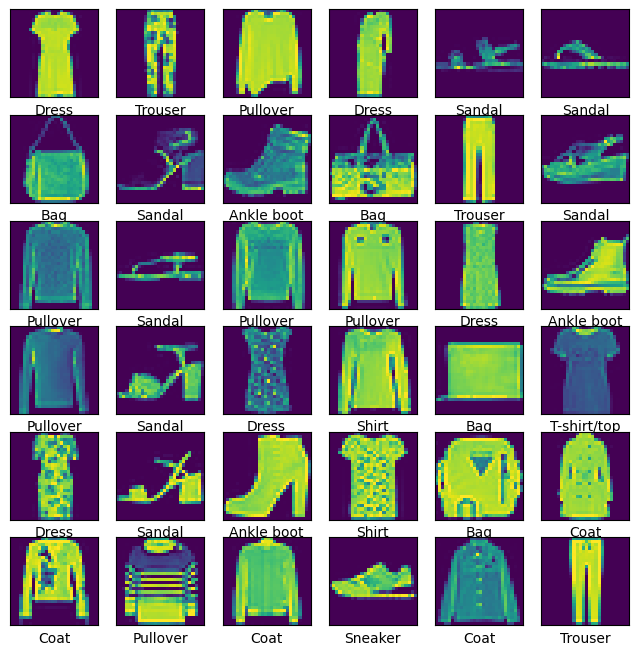

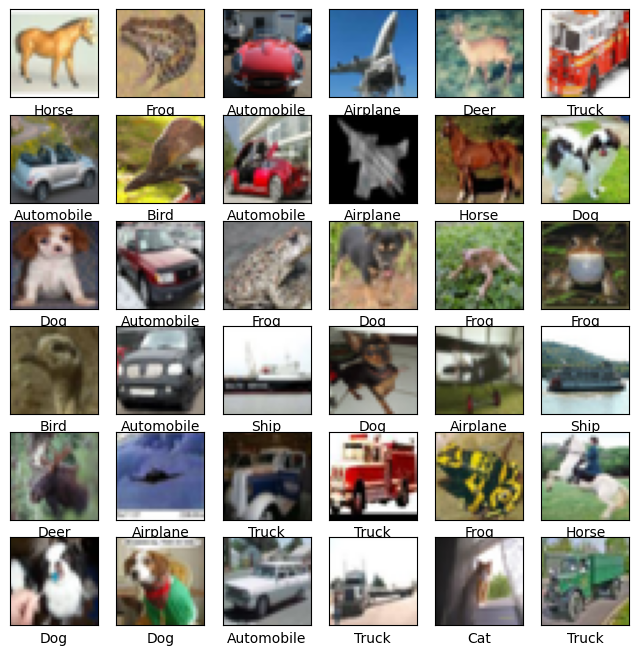

In [ ]:
# FASHION
plt.figure(figsize=(8, 8))

rows = 6
columns = 6
for i in range(rows*columns):
  plt.subplot(rows, columns, i+1)
  plt.imshow(X_train_fashion_raw[i].reshape(28, 28))
  plt.xlabel(labels_fashion[y_train_fashion_beforeSplit[i]])
  plt.yticks([])
  plt.xticks([])

plt.show()

# CIFAR 10
plt.figure(figsize=(8, 8))

rows = 6
columns = 6

for i in range(rows * columns):
    plt.subplot(rows, columns, i + 1)
    plt.imshow(X_train_CIFAR10_raw[i].permute(1, 2, 0))
    plt.xlabel(labels_CIFAR10[y_train_CIFAR10_beforeSplit[i]])
    plt.yticks([])
    plt.xticks([])

plt.show()

# Task 2: Implement a Multilayer Perceptron

In [ ]:



def preprocess_data(X_train, X_test):
    # Convert to float32 for numerical stability
    #Dont remove, else it UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('float64') to dtype('uint8') with casting rule 'same_kind'
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')

    # Mean subtraction
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_test -= mean_image

    # Normalization
    std_dev = np.std(X_train, axis=0)
    std_dev[std_dev == 0] = 1  # avoid division by zero
    X_train /= std_dev
    X_test /= std_dev

    return X_train, X_test

def load_dataset(dataset_name, normalize=True):
    if dataset_name == "fashion_mnist":
        (X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
    elif dataset_name == "cifar10":
        (X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
    else:
        raise ValueError("Unknown dataset: " + dataset_name)

    # Preprocess the data
    if normalize:
      X_train, X_test = preprocess_data(X_train, X_test)
    X_train = X_train.reshape(X_train.shape[0], -1)  # Flatten
    X_test = X_test.reshape(X_test.shape[0], -1)     # Flatten

    # Reshape labels to be 2D arrays
    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)

    # One-hot encode the labels
    one_hot_encoder = OneHotEncoder(sparse=False)
    y_train = one_hot_encoder.fit_transform(y_train)
    y_test = one_hot_encoder.transform(y_test)

    return X_train, X_test, y_train, y_test

# Task 2


In [ ]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def hyperbolic_tangent(x):
    return np.tanh(x)

def hyperbolic_tangent_derivative(x):
    return 1-np.tanh(x)**2

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def leaky_relu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1.0, alpha)

def softmax(x):
    e_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return e_x / np.sum(e_x, axis=-1, keepdims=True)

In [ ]:
def evaluate_acc(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [ ]:
class MLP:
    def __init__(self, input_size, hidden_layers, output_size, activation_func=relu, activation_derivative=relu_derivative, initializer='xavier', reg_type=None, reg_coeff=0.0):
        self.layers = [input_size] + hidden_layers + [output_size]
        self.params = {}
        self.activation_func = activation_func
        self.activation_derivative = activation_derivative
        self.init_weights(initializer)
        self.reg_type = reg_type
        self.reg_coeff = reg_coeff

    def init_weights(self, initializer):
        for i in range(1, len(self.layers)):
          if initializer == 'zeros':
              self.params['W' + str(i)] = np.zeros((self.layers[i - 1], self.layers[i]))
          elif initializer == 'uniform':
              self.params['W' + str(i)] = np.random.uniform(-1, 1, (self.layers[i - 1], self.layers[i]))
          elif initializer == 'gaussian':
              self.params['W' + str(i)] = np.random.randn(self.layers[i - 1], self.layers[i])
          elif initializer == 'xavier':
              stddev = np.sqrt(1 / self.layers[i - 1])
              self.params['W' + str(i)] = np.random.randn(self.layers[i - 1], self.layers[i]) * stddev
          elif initializer == 'kaiming':
              stddev = np.sqrt(2 / self.layers[i - 1])
              self.params['W' + str(i)] = np.random.randn(self.layers[i - 1], self.layers[i]) * stddev
          else:
              raise ValueError("Unknown initializer: " + initializer)

          self.params['b' + str(i)] = np.zeros((1, self.layers[i]))

    def forward(self, X):
        cache = {'A0': X}
        for i in range(1, len(self.layers)):
            #Z means weighted sum to each layer
            #A means the activation output for each layer
            cache['Z' + str(i)] = np.dot(cache['A' + str(i - 1)], self.params['W' + str(i)]) + self.params['b' + str(i)]
            if i != len(self.layers) - 1:
              cache['A' + str(i)] = self.activation_func(cache['Z' + str(i)])
            else:
              cache['A' + str(i)] = softmax(cache['Z' + str(i)])
        return cache

    def backward(self, cache, y):
        m = y.shape[0]
        grads = {}
        dZ = self.cross_entropy_derivative(y, cache['A' + str(len(self.layers) - 1)])
        for i in range(len(self.layers) - 1, 0, -1):
            grads['dW' + str(i)] = np.dot(cache['A' + str(i - 1)].T, dZ) / m
            if self.reg_type == 'l1':
                grads['dW' + str(i)] += self.grad_l1_regularization(self.params['W' + str(i)]) / m
            elif self.reg_type == 'l2':
                grads['dW' + str(i)] += self.grad_l2_regularization(self.params['W' + str(i)]) / m

            grads['db' + str(i)] = np.sum(dZ, axis=0, keepdims=True) / m
            if i > 1:
                dA = np.dot(dZ, self.params['W' + str(i)].T)
                dZ = dA * self.activation_derivative(cache['Z' + str(i - 1)])
        return grads

    def update_params(self, grads, learning_rate):
        for i in range(1, len(self.layers)):
            self.params['W' + str(i)] -= learning_rate * grads['dW' + str(i)]
            self.params['b' + str(i)] -= learning_rate * grads['db' + str(i)]

    def fit(self, X, y, learning_rate=0.01, epochs=100, batch_size=32):
        accuracies = []
        for epoch in range(epochs):
            indices = np.arange(X.shape[0])
            np.random.shuffle(indices)
            X = X[indices]
            y = y[indices]
            for i in range(0, X.shape[0], batch_size):
                X_batch = X[i:i + batch_size]
                y_batch = y[i:i + batch_size]
                cache = self.forward(X_batch)
                grads = self.backward(cache, y_batch)
                self.update_params(grads, learning_rate)
            if (epoch + 1) % 10 == 0:
                predictions = self.predict(X)
                accuracy = evaluate_acc(np.argmax(y, axis=1), np.argmax(predictions, axis=1))
                loss = self.cross_entropy(y, predictions)
                accuracies.append(accuracy)
                print("Epoch [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%".format(epoch + 1, epochs, loss, accuracy * 100))
        return accuracies

    def predict(self, X):
        return self.forward(X)['A' + str(len(self.layers) - 1)]

    def cross_entropy(self, y_true, y_pred):
        loss = -np.sum(y_true * np.log(y_pred + 1e-10)) / y_true.shape[0]
        if self.reg_type == 'l1':
            for i in range(1, len(self.layers)):
                loss += self.l1_regularization(self.params['W' + str(i)]) / y_true.shape[0]
        elif self.reg_type == 'l2':
            for i in range(1, len(self.layers)):
                loss += self.l2_regularization(self.params['W' + str(i)]) / y_true.shape[0]

        return loss

    def cross_entropy_derivative(self, y_true, y_pred):
        return y_pred - y_true

    def l1_regularization(self, W):
        return self.reg_coeff * np.sum(np.abs(W))

    def l2_regularization(self, W):
        return 0.5 * self.reg_coeff * np.sum(np.square(W))

    def grad_l1_regularization(self, W):
        return self.reg_coeff * np.sign(W)

    def grad_l2_regularization(self, W):
        return self.reg_coeff * W

# Task 3

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training model with weight initialization: Zeros
Epoch [10/100], Loss: 2.3026, Accuracy: 10.00%
Epoch [20/100], Loss: 2.3026, Accuracy: 10.00%
Epoch [30/100], Loss: 2.3026, Accuracy: 10.00%
Epoch [40/100], Loss: 2.3026, Accuracy: 10.00%
Epoch [50/100], Loss: 2.3026, Accuracy: 10.00%
Epoch [60/100], Loss: 2.3026, Accuracy: 10.00%
Epoch [70/100], Loss: 2.3026, Accuracy: 10.00%
Epoch [80/100], Loss: 2.3026, Accuracy: 10.00%
Epoch [90/100], Loss: 2.3026, Accuracy: 10.00%
Epoch [100/100], Loss: 2.3026, Accuracy: 10.00%
Test accuracy for Zeros: 0.10
Training model with weight initialization: Uniform
Epoch [10/100], Loss: 0.6892, Accuracy: 83.91%
Epoch [20/100], Loss: 0.7078, Accuracy: 83.88%
Epoch [30/100], Loss: 0.5462, Accuracy: 83.83%
Epoch [40/100], Loss: 0.4304, Accuracy: 86.71%
Epoch [50/100], Loss: 0.3861, Accuracy: 87.47%
Epoch [60/100], Loss: 0.4486, Accuracy: 86.08%
Epoch [70/100], Loss: 0.3631, Accuracy: 87.97%
Epoch [80/100], Loss: 0.3384, Accuracy: 88.70%
Epoch [90/100], Loss: 0

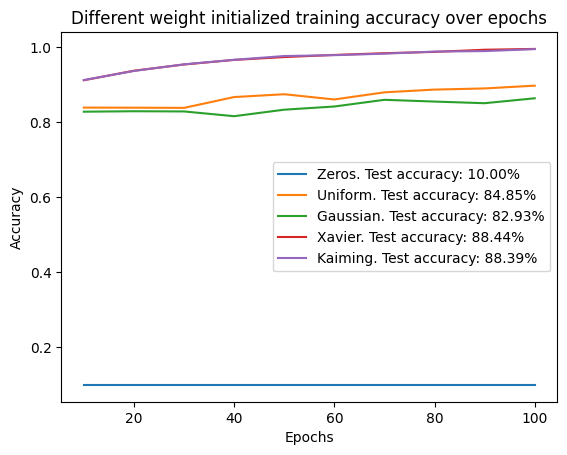

In [ ]:
dataset_name = "fashion_mnist"  # or "cifar10"
X_train, X_test, y_train, y_test = load_dataset(dataset_name)

# Initialize the MLP
input_size = X_train.shape[1]
hidden_layers = [128]
output_size = y_train.shape[1]

models = {
    "Zeros": MLP(input_size=input_size, hidden_layers=hidden_layers, output_size=output_size, initializer='zeros'),
    "Uniform": MLP(input_size=input_size, hidden_layers=hidden_layers, output_size=output_size, initializer='uniform'),
    "Gaussian": MLP(input_size=input_size, hidden_layers=hidden_layers, output_size=output_size, initializer='gaussian'),
    "Xavier": MLP(input_size=input_size, hidden_layers=hidden_layers, output_size=output_size, initializer='xavier'),
    "Kaiming": MLP(input_size=input_size, hidden_layers=hidden_layers, output_size=output_size, initializer='kaiming')
}

learning_rate = 0.01
epochs = 100
batch_size = 32

results = {}
epochs_x = [10,20,30,40,50,60,70,80,90,100]

for method, model in models.items():
    print(f"Training model with weight initialization: {method}")

    # Train the model
    train_accuracies = model.fit(X_train, y_train, learning_rate=learning_rate, epochs=epochs, batch_size=batch_size)

    predictions = model.predict(X_test)
    accuracy = evaluate_acc(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))

    results[method] = {
        "model": model,
        "testAccuracy": accuracy,
        "trainAccuracies": train_accuracies
    }
    print(f"Test accuracy for {method}: {accuracy:.2f}")

i=0.00
for method, result in results.items():
    i -= 0.01
    print(result)
    train_accuracies = result["trainAccuracies"]
    plt.plot(epochs_x, train_accuracies, label="{}. Test accuracy: {:.2%}".format(method, result["testAccuracy"]))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Different weight initialized training accuracy over epochs')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training model with zero hidden layers
Epoch [10/100], Loss: 0.3832, Accuracy: 86.80%
Epoch [20/100], Loss: 0.3711, Accuracy: 87.04%
Epoch [30/100], Loss: 0.3678, Accuracy: 87.27%
Epoch [40/100], Loss: 0.3593, Accuracy: 87.50%
Epoch [50/100], Loss: 0.3570, Accuracy: 87.57%
Epoch [60/100], Loss: 0.3532, Accuracy: 87.70%
Epoch [70/100], Loss: 0.3498, Accuracy: 87.75%
Epoch [80/100], Loss: 0.3487, Accuracy: 87.81%
Epoch [90/100], Loss: 0.3506, Accuracy: 87.72%
Epoch [100/100], Loss: 0.3487, Accuracy: 87.78%
Test accuracy for zero: 0.84
Training model with one hidden layers
Epoch [10/100], Loss: 0.2477, Accuracy: 91.24%
Epoch [20/100], Loss: 0.1876, Accuracy: 93.49%
Epoch [30/100], Loss: 0.1407, Accuracy: 95.34%
Epoch [40/100], Loss: 0.1136, Accuracy: 96.28%
Epoch [50/100], Loss: 0.0992, Accuracy: 96.69%
Epoch [60/100], Loss: 0.0676, Accuracy: 98.19%
Epoch [70/100], Loss: 0.0556, Accuracy: 98.61%
Epoch [80/100], Loss: 0.0418, Accuracy: 99.12%
Epoch [90/100], Loss: 0.0356, Accuracy: 99.24%


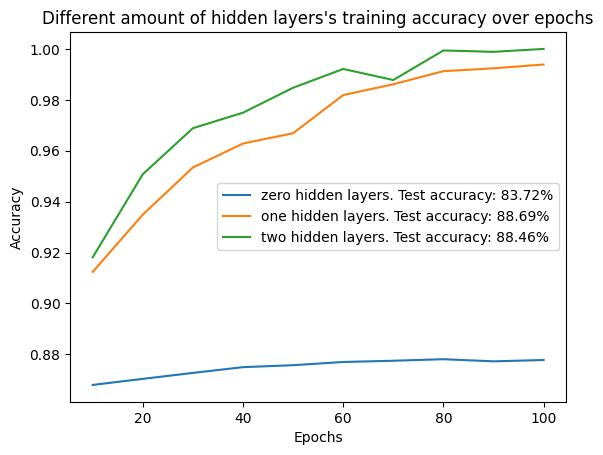

In [ ]:
dataset_name = "fashion_mnist"  # or "cifar10"
X_train, X_test, y_train, y_test = load_dataset(dataset_name)

# Initialize the MLP
input_size = X_train.shape[1]
hidden_layer_units = 128
output_size = y_train.shape[1]

models = {
    "zero": MLP(input_size=input_size, hidden_layers=[], output_size=output_size, activation_func=relu),
    "one": MLP(input_size=input_size, hidden_layers=[hidden_layer_units], output_size=output_size, activation_func=relu),
    "two": MLP(input_size=input_size, hidden_layers=[hidden_layer_units, hidden_layer_units], output_size=output_size, activation_func=relu)
}

learning_rate = 0.01
epochs = 100
batch_size = 32

results = {}
epochs_x = [10,20,30,40,50,60,70,80,90,100]

for method, model in models.items():
    print(f"Training model with {method} hidden layers")

    # Train the model
    train_accuracies = model.fit(X_train, y_train, learning_rate=learning_rate, epochs=epochs, batch_size=batch_size)

    predictions = model.predict(X_test)
    accuracy = evaluate_acc(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))

    results[method] = {
        "model": model,
        "testAccuracy": accuracy,
        "trainAccuracies": train_accuracies
    }
    print(f"Test accuracy for {method}: {accuracy:.2f}")

for method, result in results.items():
    print(result)
    train_accuracies = result["trainAccuracies"]
    plt.plot(epochs_x, train_accuracies, label="{} hidden layers. Test accuracy: {:.2%}".format(method, result["testAccuracy"]))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Different amount of hidden layers's training accuracy over epochs")
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training model with hyperbolic tangent activation function
Epoch [10/100], Loss: 0.2408, Accuracy: 91.60%
Epoch [20/100], Loss: 0.1677, Accuracy: 94.25%
Epoch [30/100], Loss: 0.1058, Accuracy: 96.68%
Epoch [40/100], Loss: 0.0707, Accuracy: 97.94%
Epoch [50/100], Loss: 0.0458, Accuracy: 98.83%
Epoch [60/100], Loss: 0.0314, Accuracy: 99.22%
Epoch [70/100], Loss: 0.0162, Accuracy: 99.80%
Epoch [80/100], Loss: 0.0102, Accuracy: 99.93%
Epoch [90/100], Loss: 0.0055, Accuracy: 100.00%
Epoch [100/100], Loss: 0.0042, Accuracy: 100.00%
Test accuracy for hyperbolic tangent: 0.88
Training model with leaky relu activation function
Epoch [10/100], Loss: 0.2244, Accuracy: 91.91%
Epoch [20/100], Loss: 0.1520, Accuracy: 94.64%
Epoch [30/100], Loss: 0.0961, Accuracy: 96.86%
Epoch [40/100], Loss: 0.0685, Accuracy: 97.83%
Epoch [50/100], Loss: 0.0516, Accuracy: 98.36%
Epoch [60/100], Loss: 0.0357, Accuracy: 98.91%
Epoch [70/100], Loss: 0.0199, Accuracy: 99.50%
Epoch [80/100], Loss: 0.0124, Accuracy: 99.75

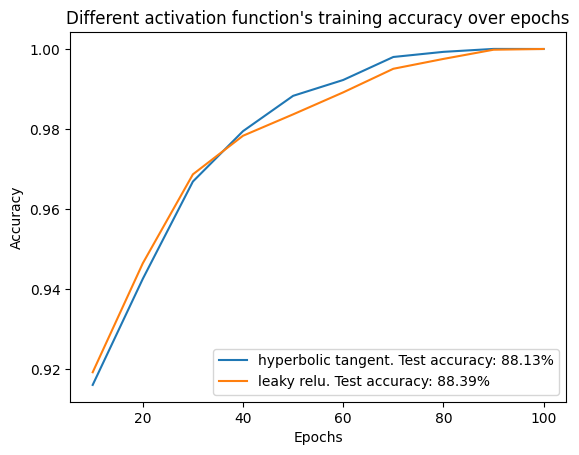

In [ ]:
dataset_name = "fashion_mnist"  # or "cifar10"
X_train, X_test, y_train, y_test = load_dataset(dataset_name)

# Initialize the MLP
input_size = X_train.shape[1]
hidden_layers = [128, 128]
output_size = y_train.shape[1]

models = {
    "hyperbolic tangent": MLP(input_size=input_size, hidden_layers=hidden_layers, output_size=output_size, activation_func=hyperbolic_tangent, activation_derivative=hyperbolic_tangent_derivative),
    "leaky relu": MLP(input_size=input_size, hidden_layers=hidden_layers, output_size=output_size, activation_func=leaky_relu, activation_derivative=leaky_relu_derivative)
}

learning_rate = 0.01
epochs = 100
batch_size = 32

results = {}
epochs_x = [10,20,30,40,50,60,70,80,90,100]

for method, model in models.items():
    print(f"Training model with {method} activation function")

    # Train the model
    train_accuracies = model.fit(X_train, y_train, learning_rate=learning_rate, epochs=epochs, batch_size=batch_size)

    predictions = model.predict(X_test)
    accuracy = evaluate_acc(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))

    results[method] = {
        "model": model,
        "testAccuracy": accuracy,
        "trainAccuracies": train_accuracies
    }
    print(f"Test accuracy for {method}: {accuracy:.2f}")

for method, result in results.items():
    print(result)
    train_accuracies = result["trainAccuracies"]
    plt.plot(epochs_x, train_accuracies, label="{}. Test accuracy: {:.2%}".format(method, result["testAccuracy"]))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Different activation function's training accuracy over epochs")
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training model with no regularization
Epoch [10/100], Loss: 0.2298, Accuracy: 91.70%
Epoch [20/100], Loss: 0.1488, Accuracy: 94.98%
Epoch [30/100], Loss: 0.0994, Accuracy: 96.82%
Epoch [40/100], Loss: 0.0674, Accuracy: 97.91%
Epoch [50/100], Loss: 0.0422, Accuracy: 98.87%
Epoch [60/100], Loss: 0.0302, Accuracy: 99.23%
Epoch [70/100], Loss: 0.0205, Accuracy: 99.44%
Epoch [80/100], Loss: 0.0079, Accuracy: 99.93%
Epoch [90/100], Loss: 0.0063, Accuracy: 99.95%
Epoch [100/100], Loss: 0.0027, Accuracy: 100.00%
Test accuracy for no regularization: 0.89
Training model with L1
Epoch [10/100], Loss: 0.3207, Accuracy: 88.47%
Epoch [20/100], Loss: 0.2916, Accuracy: 89.59%
Epoch [30/100], Loss: 0.2724, Accuracy: 90.35%
Epoch [40/100], Loss: 0.2662, Accuracy: 90.48%
Epoch [50/100], Loss: 0.2573, Accuracy: 90.55%
Epoch [60/100], Loss: 0.2581, Accuracy: 90.62%
Epoch [70/100], Loss: 0.2520, Accuracy: 90.79%
Epoch [80/100], Loss: 0.2512, Accuracy: 90.86%
Epoch [90/100], Loss: 0.2374, Accuracy: 91.42%
Ep

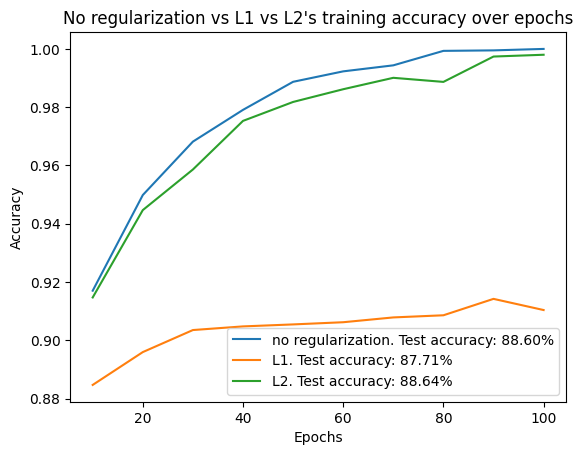

In [ ]:
dataset_name = "fashion_mnist"  # or "cifar10"
X_train, X_test, y_train, y_test = load_dataset(dataset_name)
X_train_raw, X_test_raw, y_train_raw, y_test_raw = load_dataset(dataset_name, normalize=False)

# Initialize the MLP
input_size = X_train.shape[1]
hidden_layers = [128, 128]
output_size = y_train.shape[1]

models = {
    "no regularization": MLP(input_size=input_size, hidden_layers=hidden_layers, output_size=output_size),
    "L1": MLP(input_size=input_size, hidden_layers=hidden_layers, output_size=output_size, reg_type='l1', reg_coeff=0.01),
    "L2": MLP(input_size=input_size, hidden_layers=hidden_layers, output_size=output_size, reg_type='l2', reg_coeff=0.01)
}

learning_rate = 0.01
epochs = 100
batch_size = 32

results = {}
epochs_x = [10,20,30,40,50,60,70,80,90,100]

for method, model in models.items():
    print(f"Training model with {method}")

    # Train the model
    train_accuracies = model.fit(X_train, y_train, learning_rate=learning_rate, epochs=epochs, batch_size=batch_size)

    predictions = model.predict(X_test)
    accuracy = evaluate_acc(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))

    results[method] = {
        "model": model,
        "testAccuracy": accuracy,
        "trainAccuracies": train_accuracies
    }
    print(f"Test accuracy for {method}: {accuracy:.2f}")

for method, result in results.items():
    print(result)
    train_accuracies = result["trainAccuracies"]
    plt.plot(epochs_x, train_accuracies, label="{}. Test accuracy: {:.2%}".format(method, result["testAccuracy"]))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("No regularization vs L1 vs L2's training accuracy over epochs")
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training model with normalized activation function
Epoch [10/100], Loss: 0.2328, Accuracy: 91.63%
Epoch [20/100], Loss: 0.1492, Accuracy: 94.92%
Epoch [30/100], Loss: 0.0979, Accuracy: 96.90%
Epoch [40/100], Loss: 0.0614, Accuracy: 98.22%
Epoch [50/100], Loss: 0.0477, Accuracy: 98.56%
Epoch [60/100], Loss: 0.0319, Accuracy: 99.13%
Epoch [70/100], Loss: 0.0188, Accuracy: 99.56%
Epoch [80/100], Loss: 0.0126, Accuracy: 99.72%
Epoch [90/100], Loss: 0.0098, Accuracy: 99.77%
Epoch [100/100], Loss: 0.0026, Accuracy: 100.00%
Test accuracy for normalized: 0.89
Training model with unnormalized activation function
Epoch [10/100], Loss: 2.3026, Accuracy: 10.00%
Epoch [20/100], Loss: 2.3026, Accuracy: 10.00%
Epoch [30/100], Loss: 2.3026, Accuracy: 10.00%
Epoch [40/100], Loss: 2.3026, Accuracy: 10.00%
Epoch [50/100], Loss: 2.3026, Accuracy: 10.00%
Epoch [60/100], Loss: 2.3026, Accuracy: 10.00%
Epoch [70/100], Loss: 2.3026, Accuracy: 10.00%
Epoch [80/100], Loss: 2.3026, Accuracy: 10.00%
Epoch [90/100

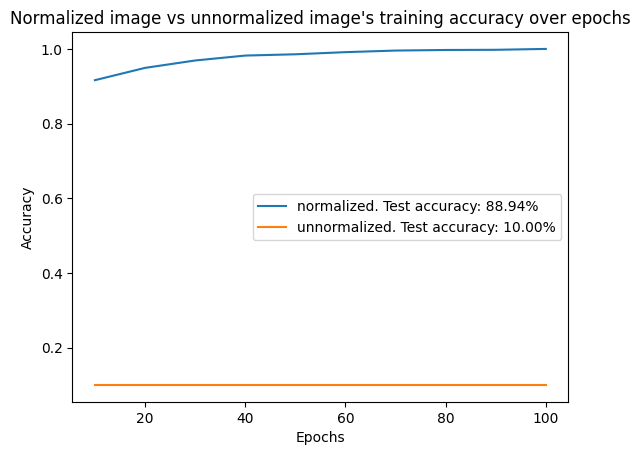

In [ ]:
dataset_name = "fashion_mnist"  # or "cifar10"
X_train, X_test, y_train, y_test = load_dataset(dataset_name)
X_train_raw, X_test_raw, y_train_raw, y_test_raw = load_dataset(dataset_name, normalize=False)

# Initialize the MLP
input_size = X_train.shape[1]
hidden_layers = [128, 128]
output_size = y_train.shape[1]

models = {
    "normalized": MLP(input_size=input_size, hidden_layers=hidden_layers, output_size=output_size),
    "unnormalized": MLP(input_size=input_size, hidden_layers=hidden_layers, output_size=output_size)
}

learning_rate = 0.01
epochs = 100
batch_size = 32

results = {}
epochs_x = [10,20,30,40,50,60,70,80,90,100]

for method, model in models.items():
    print(f"Training model with {method} activation function")

    # Train the model
    if (method == "unnormalized"):
      X_train = X_train_raw
      X_test = X_test_raw
      y_train = y_train_raw
      y_test = y_test_raw
    train_accuracies = model.fit(X_train, y_train, learning_rate=learning_rate, epochs=epochs, batch_size=batch_size)

    predictions = model.predict(X_test)
    accuracy = evaluate_acc(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))

    results[method] = {
        "model": model,
        "testAccuracy": accuracy,
        "trainAccuracies": train_accuracies
    }
    print(f"Test accuracy for {method}: {accuracy:.2f}")

for method, result in results.items():
    print(result)
    train_accuracies = result["trainAccuracies"]
    plt.plot(epochs_x, train_accuracies, label="{}. Test accuracy: {:.2%}".format(method, result["testAccuracy"]))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Normalized image vs unnormalized image's training accuracy over epochs")
plt.legend()
plt.show()

## 3.7 Train MLP on the CIFAR-10 Dataset

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training model with two hidden layers
Epoch [10/100], Loss: 0.9692, Accuracy: 10.00%
Epoch [20/100], Loss: 0.6964, Accuracy: 10.00%
Epoch [30/100], Loss: 0.5321, Accuracy: 0.00%
Epoch [40/100], Loss: 0.4201, Accuracy: 10.00%
Epoch [50/100], Loss: 0.2754, Accuracy: 0.00%
Epoch [60/100], Loss: 0.2829, Accuracy: 10.00%
Epoch [70/100], Loss: 0.2274, Accuracy: 10.00%
Epoch [80/100], Loss: 0.1422, Accuracy: 10.00%
Epoch [90/100], Loss: 0.1147, Accuracy: 10.00%
Epoch [100/100], Loss: 0.1394, Accuracy: 10.00%
Test accuracy for two: 0.10
{'model': <__main__.MLP object at 0x78445bf9fb20>, 'testAccuracy': 0.1, 'trainAccuracies': [0.1, 0.1, 0.0, 0.1, 0.0, 0.1, 0.1, 0.1, 0.1, 0.1]}


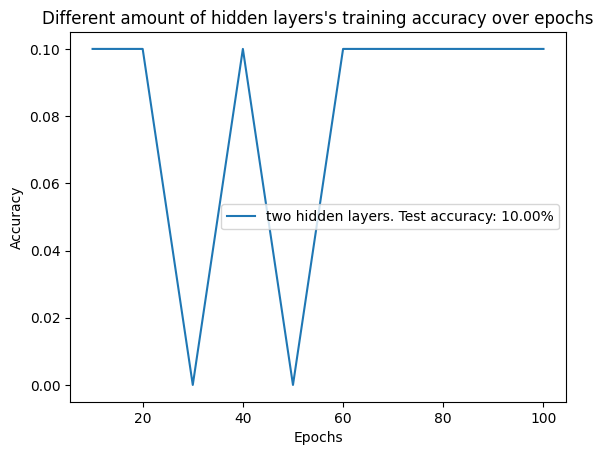

In [ ]:
dataset_name = "cifar10"
X_train, X_test, y_train, y_test = load_dataset(dataset_name)

# Initialize the MLP
input_size = X_train.shape[1]
hidden_layer_units = 128
output_size = y_train.shape[1]

models = {
    "two": MLP(input_size=input_size, hidden_layers=[hidden_layer_units, hidden_layer_units], output_size=output_size, activation_func=relu, initializer='kaiming')
}

learning_rate = 0.01
epochs = 100
batch_size = 32

results = {}
epochs_x = [10,20,30,40,50,60,70,80,90,100]

for method, model in models.items():
    print(f"Training model with {method} hidden layers")

    # Train the model
    train_accuracies = model.fit(X_train, y_train, learning_rate=learning_rate, epochs=epochs, batch_size=batch_size)

    predictions = model.predict(X_test)
    accuracy = evaluate_acc(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))

    results[method] = {
        "model": model,
        "testAccuracy": accuracy,
        "trainAccuracies": train_accuracies
    }
    print(f"Test accuracy for {method}: {accuracy:.2f}")

for method, result in results.items():
    print(result)
    train_accuracies = result["trainAccuracies"]
    plt.plot(epochs_x, train_accuracies, label="{} hidden layers. Test accuracy: {:.2%}".format(method, result["testAccuracy"]))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Different amount of hidden layers's training accuracy over epochs")
plt.legend()
plt.show()